<a href="https://colab.research.google.com/github/precious112/Machine_Learning-Projects/blob/main/Housing_prices_prediction_kc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn


In [30]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [31]:
sample = pd.read_csv('kc_house_data.csv')

In [32]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [33]:
sample.head

<bound method NDFrame.head of                id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]>

In [34]:
sample.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


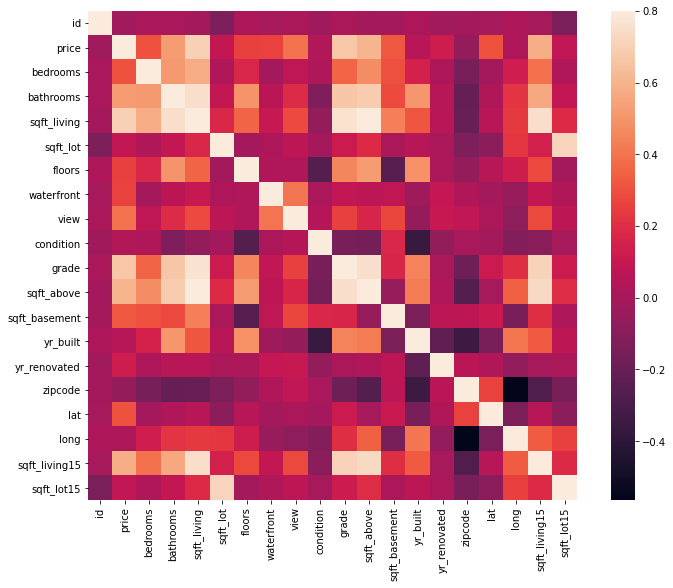

In [35]:
corrmat = sample.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
columns = sample.drop(['price'],axis=1)
X= columns
y= sample['price']
print(X.shape)
print(y.shape)

(21613, 20)
(21613,)


In [48]:
from sklearn.preprocessing import OrdinalEncoder
Ordinal= OrdinalEncoder()
X[['date']]= Ordinal.fit_transform(X[['date']])


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)

(17290, 20)
(4323, 20)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7052167446518038

In [61]:
y_predict=reg.predict(X_test)

In [66]:
print(mean_absolute_error(y_test,y_predict))

129408.53887556946


In [77]:
from sklearn.linear_model import Ridge
lasso_reg = Ridge(alpha=0.1)
lasso_reg.fit(X_train,y_train)
lasso_reg.predict(X_test)
y_pred = lasso_reg.predict(X_test)
reg.score(X_train, y_train)

0.7052167446518038

In [78]:
print(mean_absolute_error(y_test,y_pred))

129408.3015254683


In [140]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=2000, learning_rate=0.1)
gbrt.fit(X_train,y_train)
y_pred3 = gbrt.predict(X_test)

In [141]:
print(mean_absolute_error(y_test,y_pred3))

64695.431837155455


In [142]:
gbrt.score(X_test,y_test)

0.8962145860927911

In [107]:
print(y_test)

15544     459000.0
17454     445000.0
21548    1057000.0
3427      732350.0
8809      235000.0
           ...    
13597     965000.0
9648      359950.0
18627     260000.0
9553     1795000.0
14200     418000.0
Name: price, Length: 4323, dtype: float64


In [91]:
print(y_pred3)

[ 458977.23978593  449178.19428131  793924.60534835 ...  254645.70902963
 1973723.73873046  311468.4585642 ]


In [134]:
from xgboost import XGBRegressor
xbrt = XGBRegressor(n_jobs=2000, random_state=1)
xbrt.fit(X_train,y_train)
y_pred4 = xbrt.predict(X_test)

[00:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [135]:
xbrt.score(X_test,y_test)

0.8632012414017763

In [138]:
print(mean_squared_error(y_test,y_pred4))

23611598574.992764
23611598574.992764
